<a href="https://colab.research.google.com/github/Harleennn/Habit-Tracker/blob/main/rock_paper_scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow numpy opencv-python matplotlib


In [2]:
from google.colab import files
files.upload()  # Manually upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sainiharleen","key":"8521cf6bb7b2ae787c23ff262fba3895"}'}

In [3]:
!pip install kaggle  # Install Kaggle API
!mkdir ~/.kaggle  # Create a directory for Kaggle
!mv kaggle.json ~/.kaggle/  # Move kaggle.json to the correct location
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


In [4]:
!kaggle datasets download -d drgfreeman/rockpaperscissors
!unzip rockpaperscissors.zip -d rockpaperscissors/


Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
100% 306M/306M [00:15<00:00, 23.8MB/s]
100% 306M/306M [00:15<00:00, 21.0MB/s]
Archive:  rockpaperscissors.zip
  inflating: rockpaperscissors/README_rpc-cv-images.txt  
  inflating: rockpaperscissors/paper/04l5I8TqdzF9WDMJ.png  
  inflating: rockpaperscissors/paper/0Og76sl5CJhbxWWx.png  
  inflating: rockpaperscissors/paper/0RA9rcrv8iVvuDDU.png  
  inflating: rockpaperscissors/paper/0Uomd0HvOB33m47I.png  
  inflating: rockpaperscissors/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: rockpaperscissors/paper/0cb6cVL8pkfi4wF6.png  
  inflating: rockpaperscissors/paper/0eqArS2GgsBeqgSn.png  
  inflating: rockpaperscissors/paper/0t08v9bAaA0mXGCQ.png  
  inflating: rockpaperscissors/paper/0vugygEjxQJPr9yz.png  
  inflating: rockpaperscissors/paper/0zKU6wEhT2cDe9j0.png  
  inflating: rockpaperscissors/paper/14K62H4KG1hg5qiJ.png  
  inflating: rockpaperscissors/paper/1Dfw5FRlS4h60JPX.png  
  inflating: 

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = "/content/rockpaperscissors/train/"
test_dir = "/content/rockpaperscissors/test/"

# Create ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode="categorical", subset="training")
val_data = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode="categorical", subset="validation")


FileNotFoundError: [Errno 2] No such file or directory: '/content/rockpaperscissors/train/'

In [6]:
import os
print(os.listdir("/content/"))


['.config', 'rockpaperscissors.zip', 'rockpaperscissors', 'sample_data']


In [7]:
import os
import zipfile

# Define dataset path
dataset_path = "/content/rockpaperscissors.zip"

# Unzip the dataset
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Check extracted files
print(os.listdir("/content/rockpaperscissors"))


['rock', 'rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper']


In [8]:
train_dir = "/content/rockpaperscissors/"  # Corrected path


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training and validation data from the correct path
train_data = train_datagen.flow_from_directory(
    train_dir,  # Correct directory
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="training"
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)


Found 3502 images belonging to 4 classes.
Found 874 images belonging to 4 classes.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Create a simple ANN model
model = Sequential([
    Flatten(input_shape=(150, 150, 3)),  # Flatten input images
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes: Rock, Paper, Scissors
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 4), output.shape=(None, 3)

In [11]:
print("Class indices:", train_data.class_indices)


Class indices: {'paper': 0, 'rock': 1, 'rps-cv-images': 2, 'scissors': 3}


In [12]:
import os

dataset_path = "/content/rockpaperscissors"

# List directories inside the dataset
print(os.listdir(dataset_path))


['rock', 'rps-cv-images', 'scissors', 'README_rpc-cv-images.txt', 'paper']


In [13]:
import os
import shutil

# Define the original and new dataset paths
dataset_path = "/content/rockpaperscissors"
filtered_path = "/content/filtered_rockpaperscissors"

# Create a new directory
os.makedirs(filtered_path, exist_ok=True)

# Move only the required classes to the new directory
for category in ['rock', 'paper', 'scissors']:
    src = os.path.join(dataset_path, category)
    dest = os.path.join(filtered_path, category)
    if os.path.exists(src):
        shutil.move(src, dest)

# Verify that only 3 folders exist
print("Filtered dataset contents:", os.listdir(filtered_path))


Filtered dataset contents: ['rock', 'scissors', 'paper']


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,       # Rotate images randomly
    width_shift_range=0.2,   # Shift width
    height_shift_range=0.2,  # Shift height
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom in/out
    horizontal_flip=True,     # Flip images horizontally
    validation_split=0.2      # 20% validation data
)


val_data = train_datagen.flow_from_directory(
    filtered_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical",
    subset="validation"
)

# Print class indices
print("Class indices:", train_data.class_indices)


Found 437 images belonging to 3 classes.
Class indices: {'paper': 0, 'rock': 1, 'scissors': 2}


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(150, 150, 3)),  # Ensure input shape
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # 3 output classes
])


In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, validation_data=val_data, epochs=30)


Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - accuracy: 0.3372 - loss: 1.0991 - val_accuracy: 0.3410 - val_loss: 1.0985
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.3438 - loss: 1.0986 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 133ms/step - accuracy: 0.3479 - loss: 1.0984 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.3487 - loss: 1.0985 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.3575 - loss: 1.0978 - val_accuracy: 0.3410 - val_loss: 1.0982
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 134ms/step - accuracy: 0.3360 - loss: 1.0986 - val_accuracy: 0.3432 - val_loss: 1.0986
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 6s 119ms/step - accuracy: 0.3355 - loss: 1.0986 - val_accuracy: 0.3432 - val_loss: 1.0984
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.3486 - loss: 1.0984 - val_accuracy: 0

In [32]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_data)

print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")



14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.3443 - loss: 1.0992
Validation Accuracy: 34.32%
Validation Loss: 1.0984


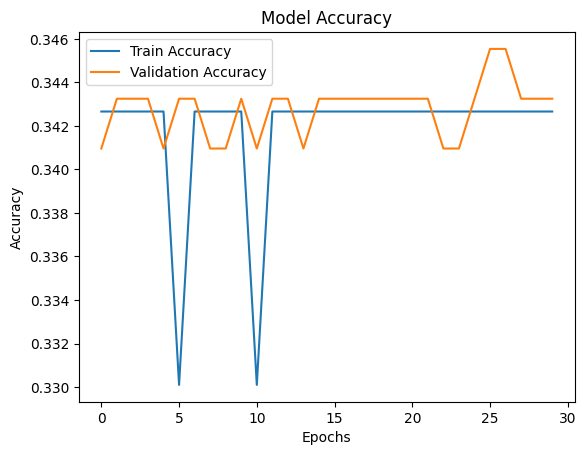

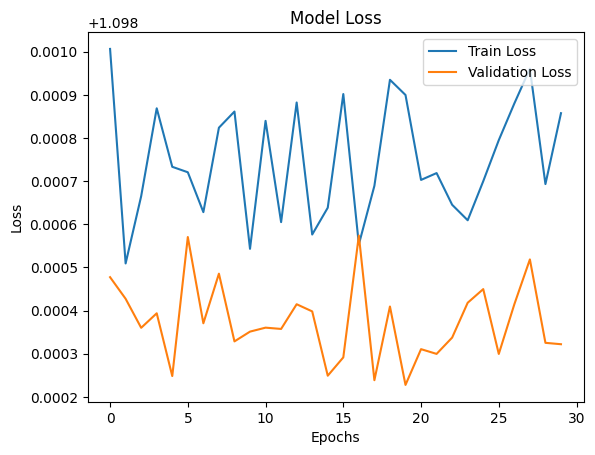

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot training & validation loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()
